In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [38]:
titanic = pd.read_csv("/Users/jerife/data/titanic/train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.shape

(891, 12)

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

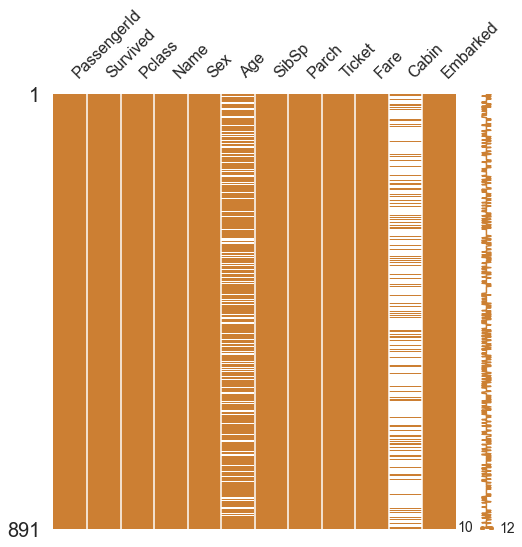

In [41]:
msno.matrix(df=titanic.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))


<AxesSubplot:>

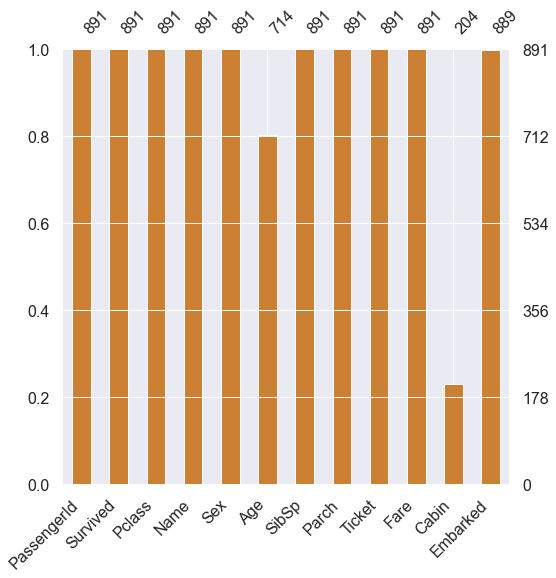

In [42]:
msno.bar(df=titanic.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


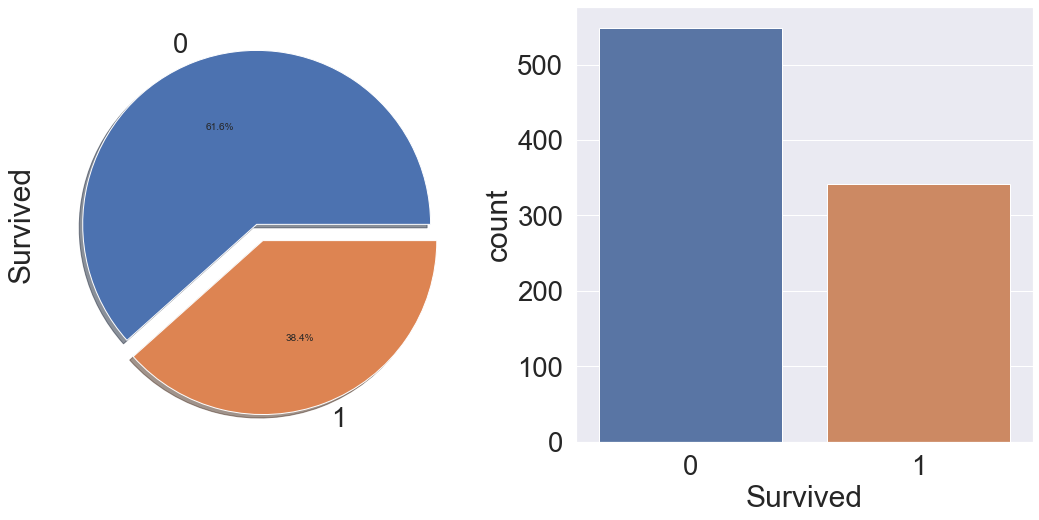

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))

titanic['Survived'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)
sns.countplot('Survived',data=titanic,ax=ax[1])

plt.show()

In [44]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Cabin'] = titanic['Cabin'].fillna("N")
titanic['Embarked'] = titanic['Embarked'].fillna("N")

In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [47]:
titanic[['Pclass','Survived']].groupby(['Survived'],as_index=True).count()

,Pclass
Survived,
0,549
1,342


In [48]:
pd.crosstab(titanic['Pclass'],titanic['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

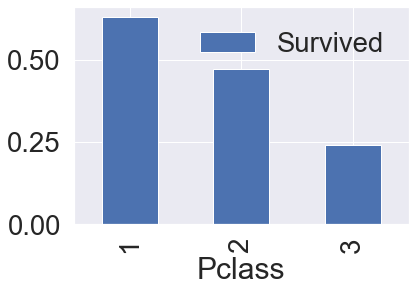

In [49]:
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


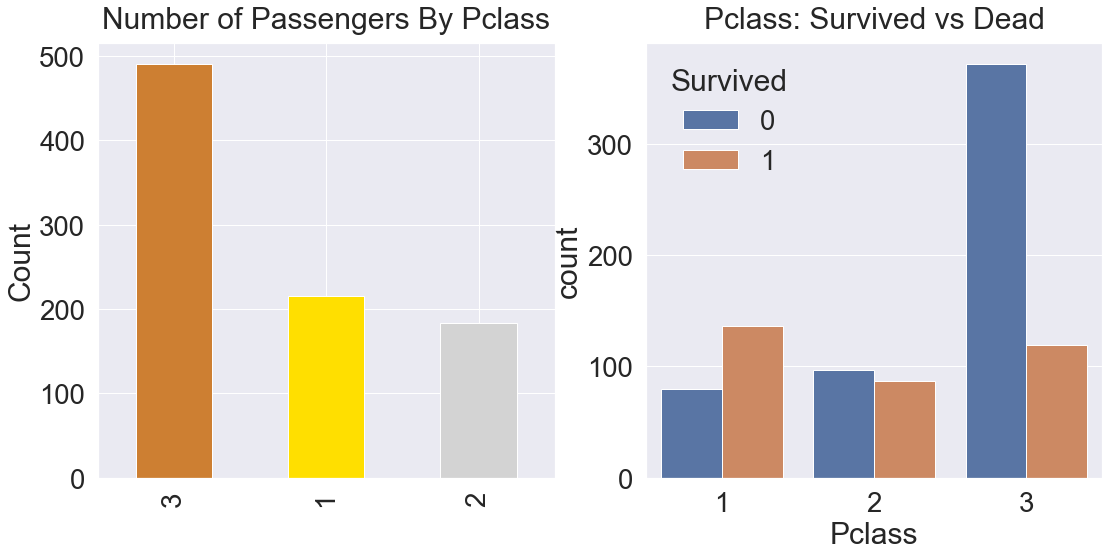

In [50]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

In [51]:
pd.crosstab(titanic['Sex'],titanic['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


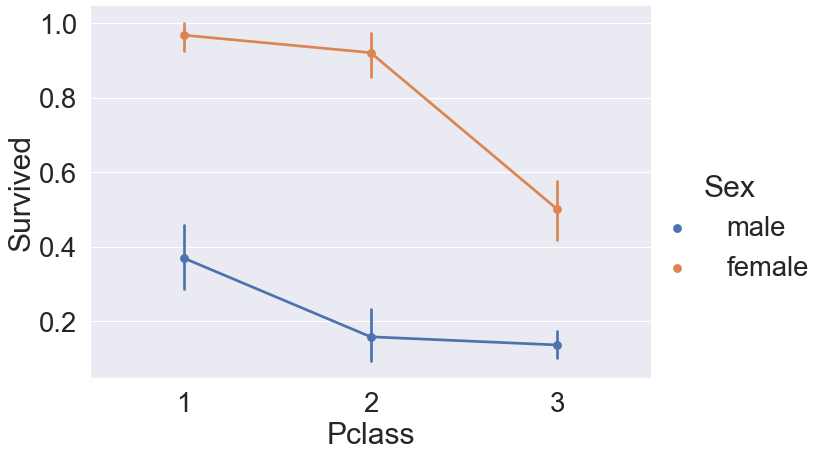

In [52]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic,size=6,aspect=1.5)

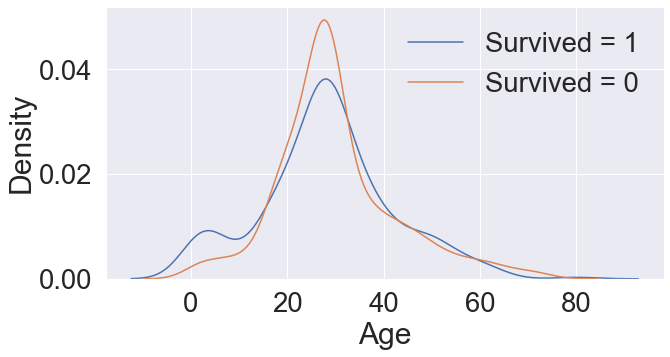

In [75]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(titanic[titanic['Survived']==1]['Age'],ax=ax)
sns.kdeplot(titanic[titanic['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived = 1','Survived = 0'])
plt.show()

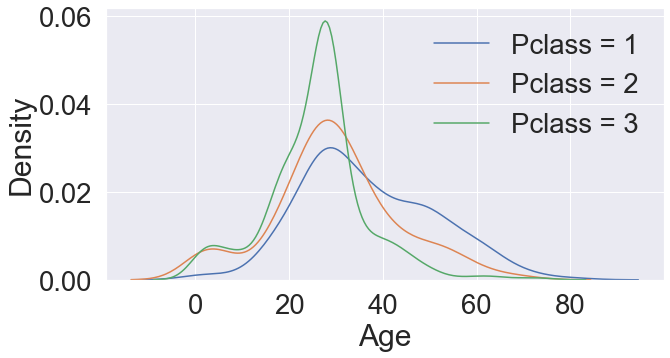

In [76]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(titanic[titanic['Pclass']==1]['Age'],ax=ax)
sns.kdeplot(titanic[titanic['Pclass']==2]['Age'],ax=ax)
sns.kdeplot(titanic[titanic['Pclass']==3]['Age'],ax=ax)
plt.legend(['Pclass = 1','Pclass = 2','Pclass = 3'])
plt.show()

In [22]:
age_list = []
for i in range(1,80):
    age_list.append(
        titanic[titanic['Age']<i]['Survived'].sum()/
        len(titanic[titanic['Age']<i]['Survived'])
    )
age_list

[1.0,
 0.8571428571428571,
 0.625,
 0.6666666666666666,
 0.675,
 0.7045454545454546,
 0.7021276595744681,
 0.68,
 0.6666666666666666,
 0.6129032258064516,
 0.59375,
 0.5735294117647058,
 0.5797101449275363,
 0.5915492957746479,
 0.5769230769230769,
 0.5903614457831325,
 0.55,
 0.5398230088495575,
 0.5035971223021583,
 0.4817073170731707,
 0.45555555555555555,
 0.4264705882352941,
 0.42424242424242425,
 0.41700404858299595,
 0.4244604316546763,
 0.4119601328903654,
 0.40752351097178685,
 0.41839762611275966,
 0.36968576709796674,
 0.37076648841354726,
 0.3707482993197279,
 0.37355371900826445,
 0.3776,
 0.378125,
 0.3780487804878049,
 0.38427299703264095,
 0.38737446197991393,
 0.38549075391180654,
 0.3865546218487395,
 0.385989010989011,
 0.38627187079407804,
 0.38584779706275035,
 0.38713910761154857,
 0.3859191655801825,
 0.3853092783505155,
 0.3848101265822785,
 0.3833543505674653,
 0.3802992518703242,
 0.3834771886559803,
 0.38555691554467564,
 0.38694074969770254,
 0.3860911270983

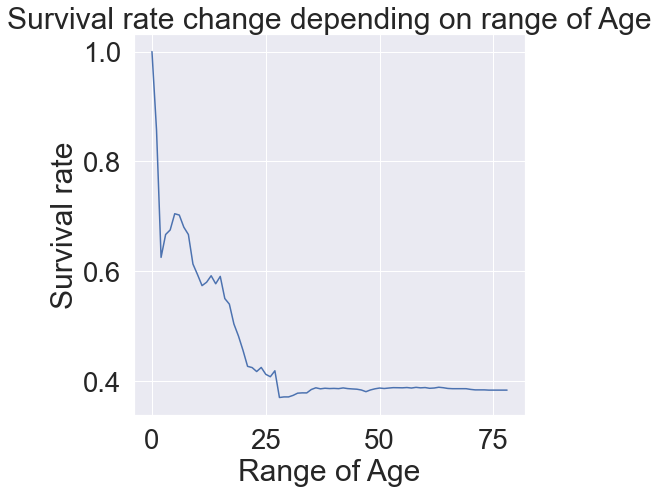

In [24]:
plt.figure(figsize=(7,7))
plt.plot(age_list)
plt.title("Survival rate change depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age")
plt.show()

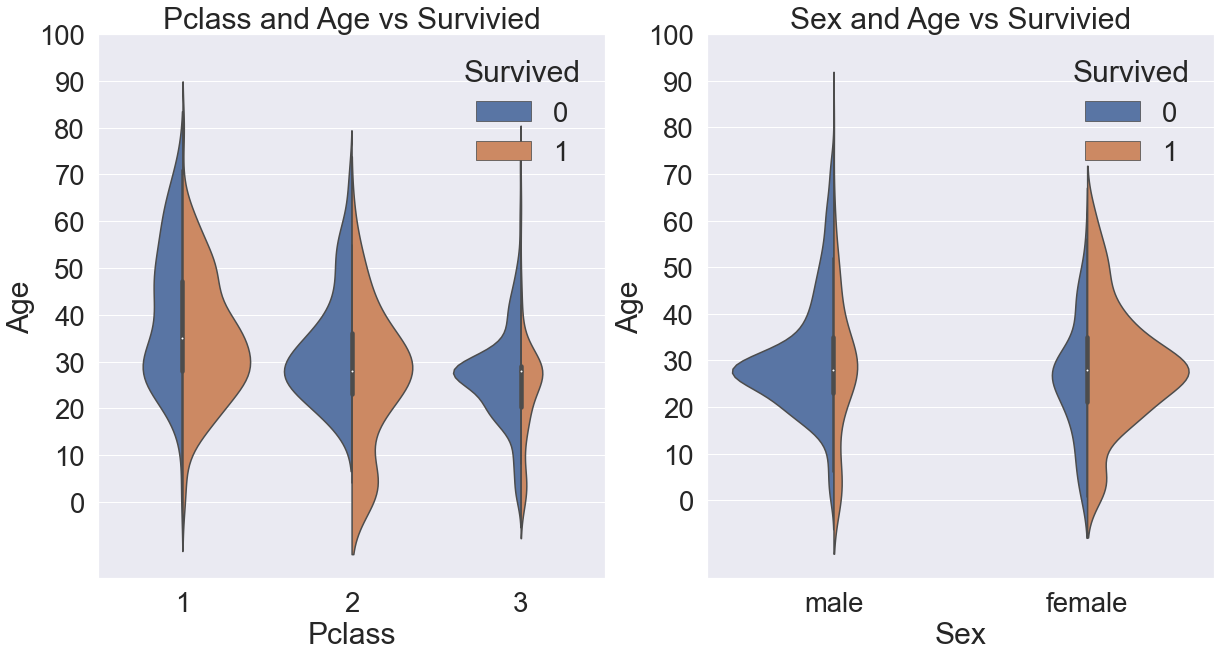

In [61]:
f,ax=plt.subplots(1,2,figsize=[20,10])

sns.violinplot("Pclass","Age",hue="Survived",data=titanic,scale="count",split=True,ax=ax[0])
ax[0].set_title("Pclass and Age vs Survivied")
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue="Survived",data=titanic,scale="count",split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survivied")
ax[1].set_yticks(range(0,110,10))

plt.show()

<AxesSubplot:xlabel='Embarked'>

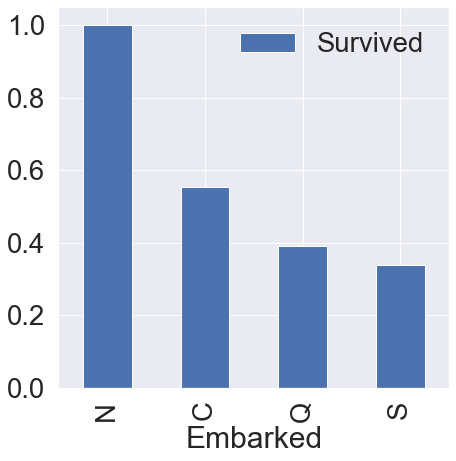

In [62]:
f,ax = plt.subplots(1,1,figsize=(7,7))
titanic[['Embarked','Survived']].groupby(['Embarked'],as_index = True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

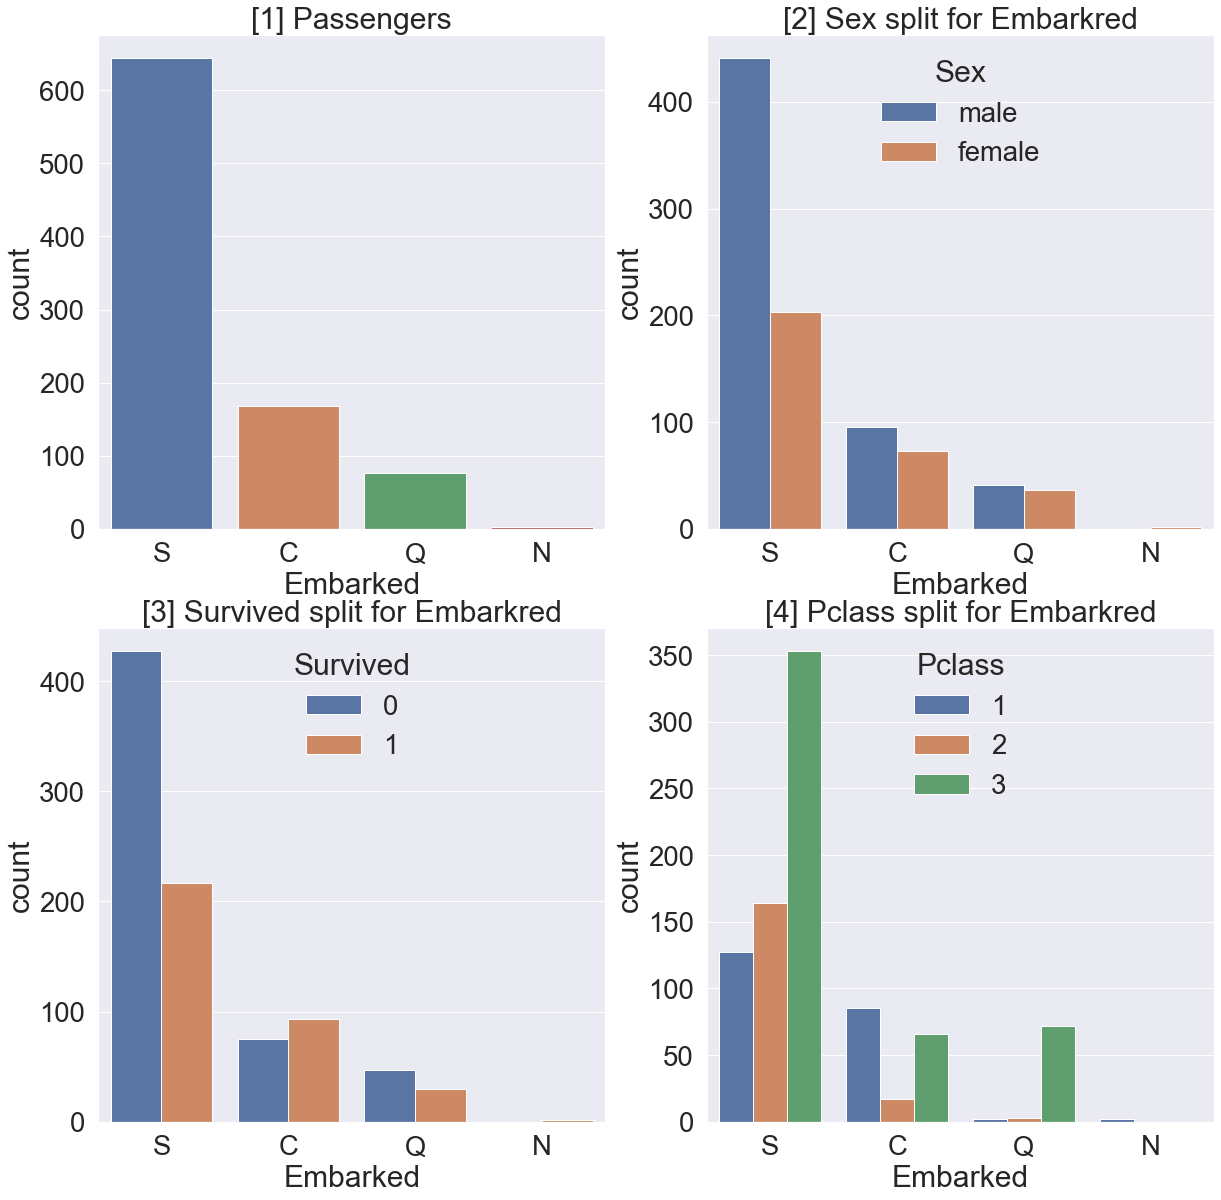

In [59]:
f,ax = plt.subplots(2,2,figsize=(20,20))
#sub 1
sns.countplot("Embarked",data=titanic,ax=ax[0,0])
ax[0,0].set_title("[1] Passengers")
#sub 2
sns.countplot("Embarked",hue="Sex",data=titanic,ax=ax[0,1])
ax[0,1].set_title("[2] Sex split for Embarkred")
#sub 3
sns.countplot("Embarked",hue="Survived",data=titanic,ax=ax[1,0])
ax[1,0].set_title("[3] Survived split for Embarkred")
#sub 4
sns.countplot("Embarked",hue="Pclass",data=titanic,ax=ax[1,1])
ax[1,1].set_title("[4] Pclass split for Embarkred")
plt.show()

In [56]:
titanic["Family"] = titanic["SibSp"] + titanic["Parch"] + 1 #1 meaing "ME"
titanic["Family"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family, Length: 891, dtype: int64

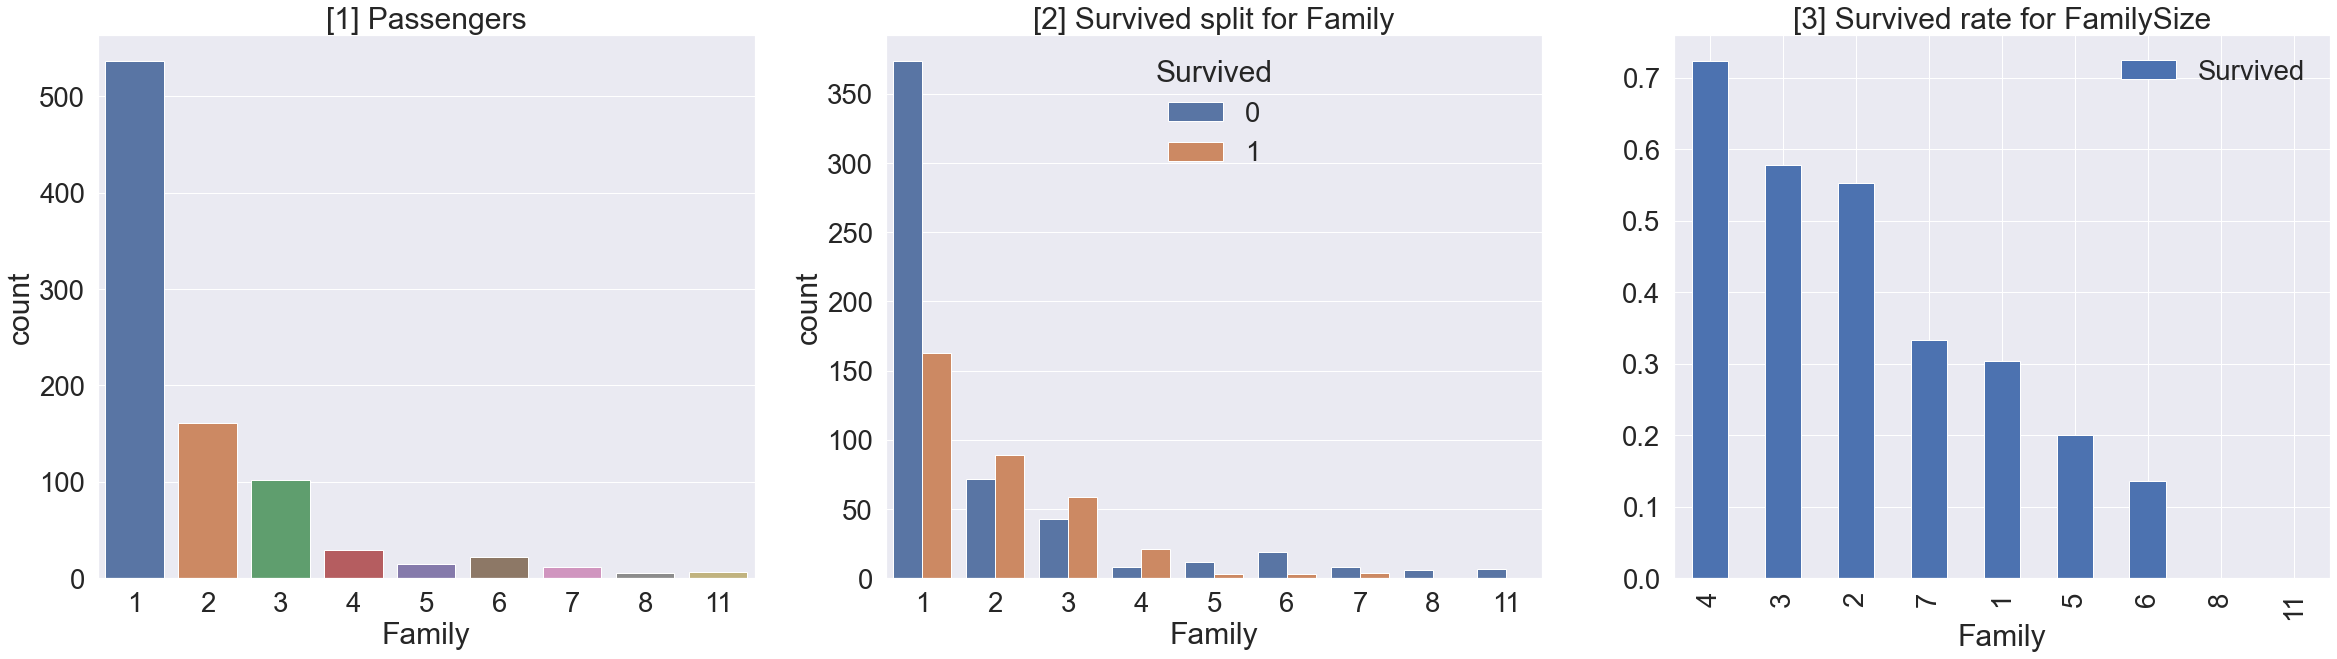

In [73]:
f,ax=plt.subplots(1,3,figsize=(40,10))
#sub 1
sns.countplot("Family",data=titanic,ax=ax[0])
ax[0].set_title("[1] Passengers")
#sub 2
sns.countplot("Family",hue="Survived",data=titanic,ax=ax[1])
ax[1].set_title("[2] Survived split for Family")
#sub 3
titanic[["Family","Survived"]].groupby(["Family"],as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("[3] Survived rate for FamilySize")
plt.show()

In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


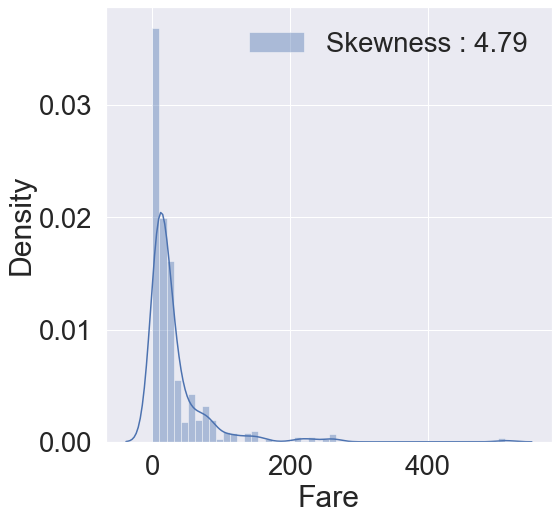

In [82]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)
plt.legend(loc='best')

In [86]:
titanic.loc[titanic["Fare"].isnull(),"Fare"] = titanic["Fare"].mean()

titanic["Fare"] = titanic["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

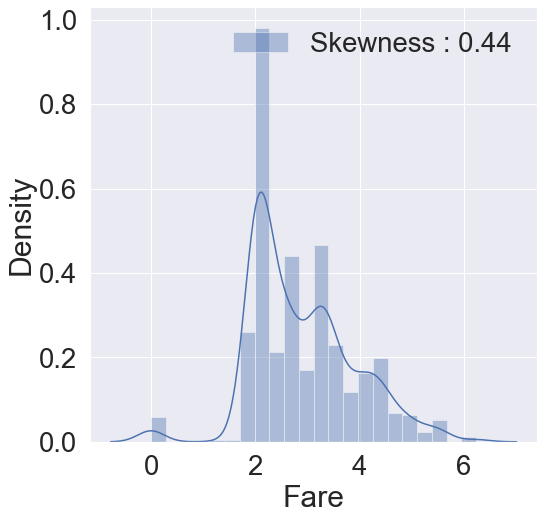

In [89]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.distplot(titanic['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic['Fare'].skew()), ax=ax)
plt.legend(loc='best')


In [90]:
titanic.shape

(891, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3bb403890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3bb4035d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3bb403d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3bb417150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3bb417d90>],
 'means': []}

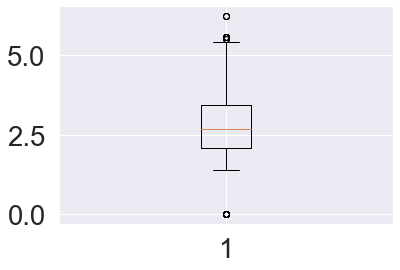

In [91]:
plt.boxplot(titanic['Fare'])

In [92]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,N,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,N,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,N,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,N,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,3.154870,N,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1


In [94]:
titanic.drop(['Name','PassengerId','Parch','SibSp','Ticket'],axis=1,inplace=True)
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,1.981001,N,S,2
1,1,1,female,38.0,4.266662,C85,C,2
2,1,3,female,26.0,2.070022,N,S,1
3,1,1,female,35.0,3.972177,C123,S,2
4,0,3,male,35.0,2.085672,N,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,2.564949,N,S,1
887,1,1,female,19.0,3.401197,B42,S,1
888,0,3,female,28.0,3.154870,N,S,4
889,1,1,male,26.0,3.401197,C148,C,1


In [95]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,1.981001,N,S,2
1,1,1,female,38.0,4.266662,C,C,2
2,1,3,female,26.0,2.070022,N,S,1
3,1,1,female,35.0,3.972177,C,S,2
4,0,3,male,35.0,2.085672,N,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,2.564949,N,S,1
887,1,1,female,19.0,3.401197,B,S,1
888,0,3,female,28.0,3.154870,N,S,4
889,1,1,male,26.0,3.401197,C,C,1


In [96]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  891 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [99]:
titanic["Cabin"].value_counts()
titanic.drop("Cabin",axis=1,inplace=True)

In [100]:
titanic.shape

(891, 7)

In [101]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [106]:
titanic = pd.get_dummies(titanic)
titanic

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,3,22.0,1.981001,2,0,1,0,0,0,1
1,1,1,38.0,4.266662,2,1,0,1,0,0,0
2,1,3,26.0,2.070022,1,1,0,0,0,0,1
3,1,1,35.0,3.972177,2,1,0,0,0,0,1
4,0,3,35.0,2.085672,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,2.564949,1,0,1,0,0,0,1
887,1,1,19.0,3.401197,1,1,0,0,0,0,1
888,0,3,28.0,3.154870,4,1,0,0,0,0,1
889,1,1,26.0,3.401197,1,0,1,1,0,0,0


In [107]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [109]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
pred = log_reg.predict(x_test)
print("모델 정확도 측정 : ", accuracy_score(pred,y_test))


모델 정확도 측정 :  0.7847533632286996


In [111]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print("모델 정확도 측정 : ", accuracy_score(pred,y_test))

모델 정확도 측정 :  0.8116591928251121


In [112]:
param = {'max_depth':[2,4,6,8],
         'min_samples_split':[2,3,5],
         'min_samples_leaf':[1,3,5]
        }
grid = GridSearchCV(dtree,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [115]:
grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [117]:
grid.best_score_

0.8282907538760907

In [118]:
score = cross_val_score(dtree,x,y,scoring='accuracy',cv=5)
score.mean()

0.7744460485845207

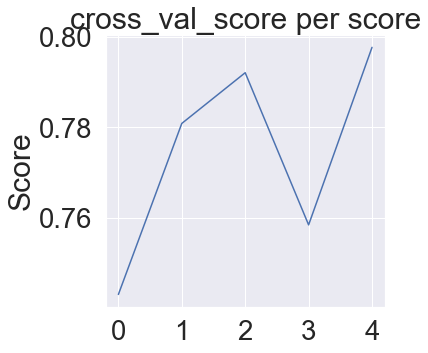

In [126]:
f,ax=plt.subplots(1,1,figsize=(5,5))
plt.plot(score)
ax.set_title("cross_val_score per score")
ax.set_xticks(range(0,5,1))
ax.set_ylabel("Score")
plt.show()